In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:, 0:10]

In [7]:
Y = dataset[:, 10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
#Model
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([Dense(32, activation='relu', input_shape=(10,)),Dense(32, activation='relu'),Dense(1, activation='sigmoid'),])

In [17]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
32/32 [==============================] - 0s 9ms/step - loss: 0.6938 - accuracy: 0.5372 - val_loss: 0.6913 - val_accuracy: 0.5753
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.6429 - val_loss: 0.6869 - val_accuracy: 0.7215
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.6614 - val_loss: 0.6834 - val_accuracy: 0.7306
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6419 - val_loss: 0.6808 - val_accuracy: 0.7260
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.7133 - val_loss: 0.6784 - val_accuracy: 0.6986
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.6840 - val_loss: 0.6757 - val_accuracy: 0.7215
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.7250 - val_loss: 0.6728 - val_accuracy: 0.7489
Epoch 8/10
32/32 [==

In [19]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.6637 - accuracy: 0.7763


0.77625572681427

In [20]:
import matplotlib.pyplot as plt

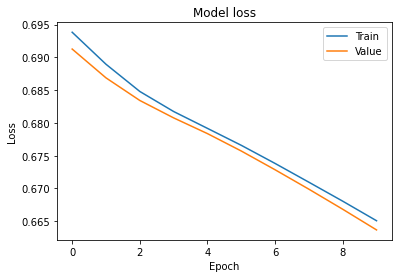

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Value'], loc='upper right')
plt.show()

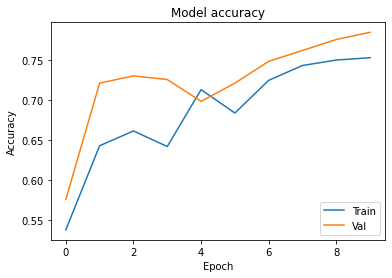

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [23]:
model_2 = Sequential([Dense(1000, activation='relu', input_shape=(10,)),Dense(1000, activation='relu'),Dense(1000, activation='relu'),Dense(1000, activation='relu'),Dense(1, activation='sigmoid'),])

In [24]:
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
hist_2 = model_2.fit(X_train, Y_train,batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
32/32 [==============================] - 2s 55ms/step - loss: 0.4692 - accuracy: 0.7622 - val_loss: 0.3661 - val_accuracy: 0.8356
Epoch 2/10
32/32 [==============================] - 1s 44ms/step - loss: 0.3339 - accuracy: 0.8581 - val_loss: 0.3139 - val_accuracy: 0.8356
Epoch 3/10
32/32 [==============================] - 1s 45ms/step - loss: 0.3046 - accuracy: 0.8767 - val_loss: 0.4008 - val_accuracy: 0.7854
Epoch 4/10
32/32 [==============================] - 1s 45ms/step - loss: 0.3158 - accuracy: 0.8601 - val_loss: 0.2568 - val_accuracy: 0.8767
Epoch 5/10
32/32 [==============================] - 1s 44ms/step - loss: 0.2834 - accuracy: 0.8836 - val_loss: 0.2561 - val_accuracy: 0.8630
Epoch 6/10
32/32 [==============================] - 1s 44ms/step - loss: 0.2693 - accuracy: 0.8845 - val_loss: 0.2454 - val_accuracy: 0.8950
Epoch 7/10
32/32 [==============================] - 1s 45ms/step - loss: 0.2516 - accuracy: 0.8933 - val_loss: 0.2936 - val_accuracy: 0.8447
Epoch 8/10
32

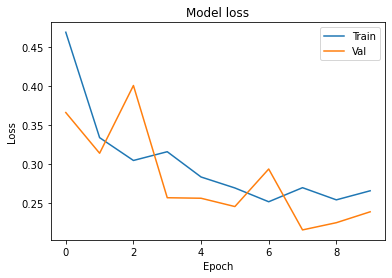

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

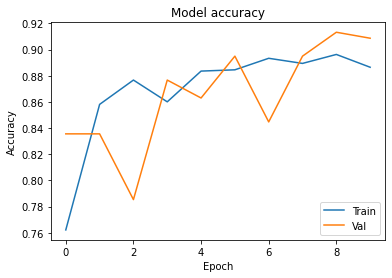

In [27]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
from keras.layers import Dropout
from keras import regularizers

In [29]:
model_3 = Sequential([Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),Dropout(0.3),Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

In [30]:
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
hist_3 = model_3.fit(X_train, Y_train,batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
32/32 [==============================] - 2s 75ms/step - loss: 14.2442 - accuracy: 0.6546 - val_loss: 3.9091 - val_accuracy: 0.6758
Epoch 2/10
32/32 [==============================] - 2s 64ms/step - loss: 1.6785 - accuracy: 0.8219 - val_loss: 0.6487 - val_accuracy: 0.8630
Epoch 3/10
32/32 [==============================] - 2s 65ms/step - loss: 0.5757 - accuracy: 0.8513 - val_loss: 0.5763 - val_accuracy: 0.8311
Epoch 4/10
32/32 [==============================] - 2s 64ms/step - loss: 0.5064 - accuracy: 0.8679 - val_loss: 0.4692 - val_accuracy: 0.8630
Epoch 5/10
32/32 [==============================] - 2s 65ms/step - loss: 0.4966 - accuracy: 0.8728 - val_loss: 0.4825 - val_accuracy: 0.8813
Epoch 6/10
32/32 [==============================] - 2s 64ms/step - loss: 0.5110 - accuracy: 0.8591 - val_loss: 0.4828 - val_accuracy: 0.8813
Epoch 7/10
32/32 [==============================] - 2s 65ms/step - loss: 0.5531 - accuracy: 0.8239 - val_loss: 0.4956 - val_accuracy: 0.8676
Epoch 8/10
3

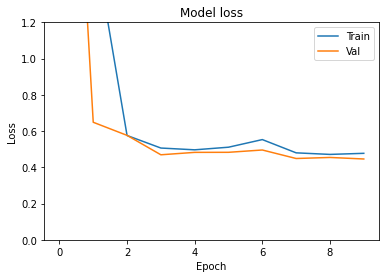

In [32]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

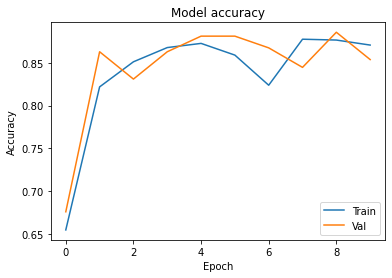

In [33]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()